## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date
%matplotlib inline

# 1.**importing** first data file "Play store data"

In [7]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')

# **2.Some basic function for understading data**

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.shape

(10841, 13)

In [11]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3.Removing all NAN values from Rating column by median of rating

In [13]:
#filling all nan value in 'Rating' with average of rating values
df['Rating'].fillna(float( df['Rating'].mean()),inplace=True)


In [14]:
#rempving all  duplicate values
df1=df.drop_duplicates()

In [15]:
df['Rating'].mean()

4.1933383153622925

In [16]:
df['Rating'].median()

4.2

In [17]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [19]:
df1['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [20]:
#removing the unwanted value
df1=df1.drop(df1.index[df1['Category']=='1.9'])

In [21]:
df1['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

#4. **Visualization (Category vs Apps)**

Text(0, 0.5, 'number')

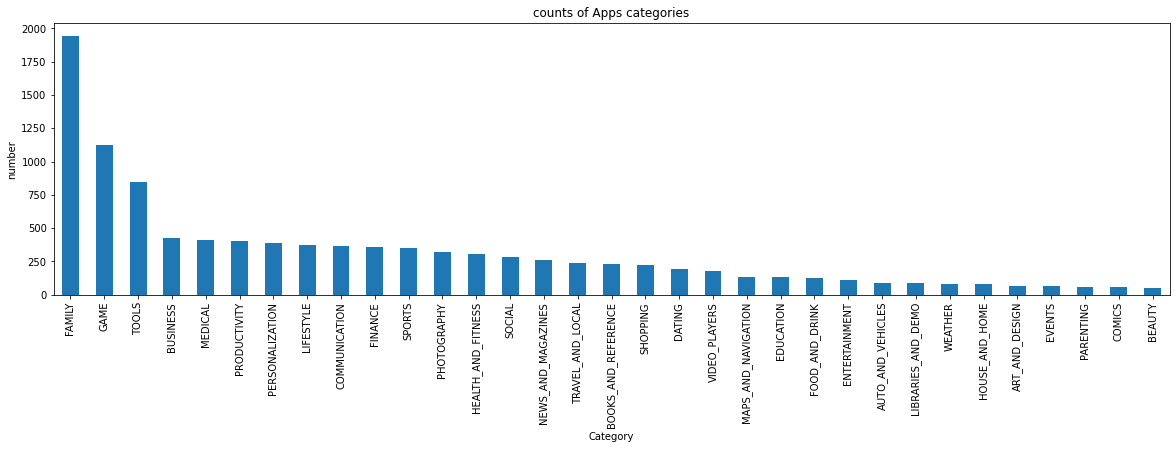

In [214]:
#ploting a bar graph for finding which category has highest share of apps
category_bar=df1['Category'].value_counts().plot.bar(figsize=(20,5))
category_bar.set_title('counts of Apps categories')
category_bar.set_xlabel('Category')
category_bar.set_ylabel('number')

#5.average ratings given to the app **visualization(Apps vs Rating)**

Text(0.5, 0, 'Rating')

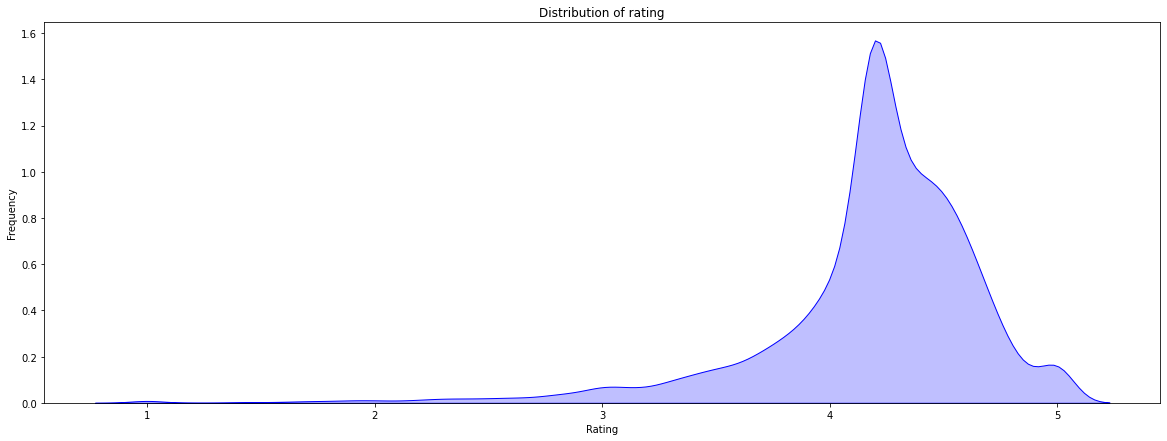

In [24]:
#finding distribution of rating
plt.figure(figsize=(20,7)) 
b= sns.kdeplot(df1.Rating,color='b',shade=True)
b.set_title('Distribution of rating')
b.set_ylabel('Frequency')
b.set_xlabel('Rating')

Text(0.5, 1.0, 'average of Ratings')

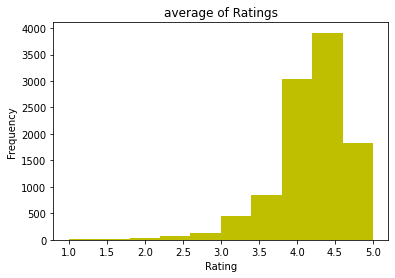

In [28]:
#finding average rating 
plt.hist(df1.Rating.values,color='y')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('average of Ratings')

# **6.finding which category have max avg installs (Category vs Install)**

In [206]:
df1['Installs'] = df1.Installs.replace({'+':'',',':''})
df1['Installs'] = df1['Installs'].apply(lambda x : float(x))

In [207]:
df1['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10357, dtype: float64

In [208]:
#grouping avg install for each Category of apps
df_install=df1.groupby(['Category'])['Installs'].mean()

Text(0, 0.5, 'Installs')

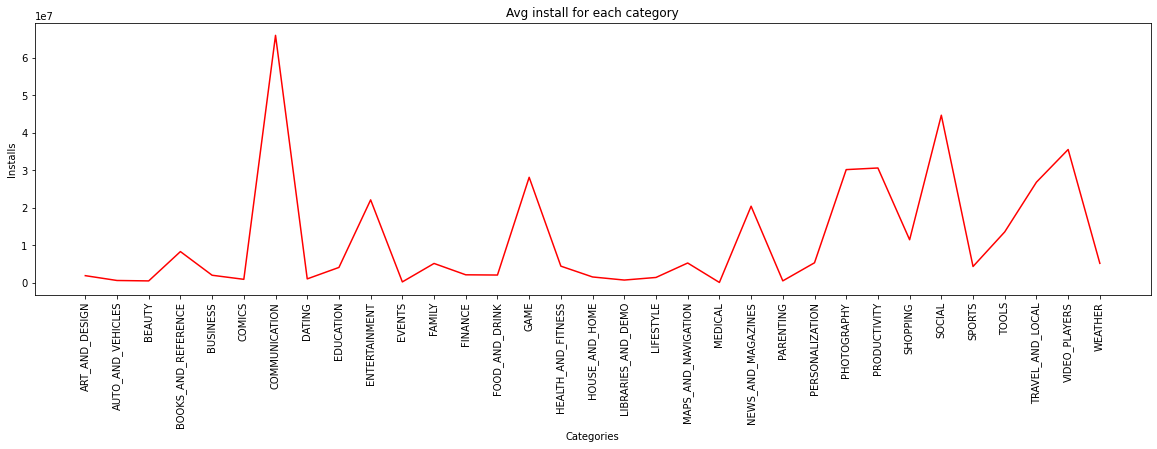

In [209]:
#finding which Category has maximum app install
plt.figure(figsize=(20,5))
plt.plot(df_install, color='r')
plt.xticks(rotation=90)
plt.title('Avg install for each category')
plt.xlabel('Categories')
plt.ylabel('Installs')

# 7.**finding which type app have more rating(Free vs Paid)**

In [33]:
#grouping rating and type(Free and Paid)
rating_free_paid=df1.groupby(['Rating'])['Type'].value_counts().unstack()

Text(0, 0.5, 'counts of type')

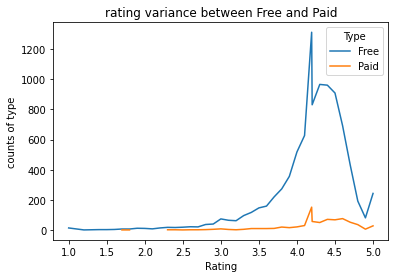

In [34]:
#comparing using multiline graph
rating_free_paid.plot()
plt.title('rating variance between Free and Paid')
plt.xlabel('Rating')
plt.ylabel('counts of type')

# **8.finding which App Category have maximum average reviews**

In [45]:
#replacing object type value in int
df1['Reviews']=df1['Reviews'].replace('3.0M',3000000)

In [46]:
#finding which app gets maximum reviews
#converting Reviews to integer data type
df1['Reviews']=df1['Reviews'].astype(int)

Text(0.5, 0, 'Category')

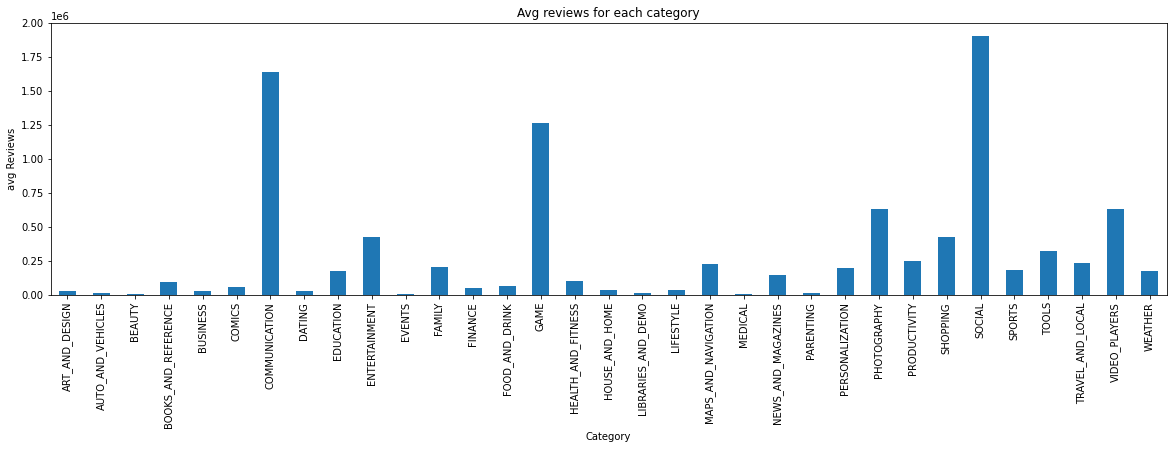

In [47]:
#Average rating for each category
avg_rating =df1.groupby(['Category'])['Reviews'].mean()
b=avg_rating.plot.bar(figsize=(20,5))
b.set_title('Avg reviews for each category')
b.set_ylabel('avg Reviews')
b.set_xlabel('Category')

#**9.finding top 10 genres of apps**

In [48]:
df1['Genres'].unique()


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [49]:
x=df['Genres'].value_counts().reset_index()[:10]
x.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)
y=df1['Genres'].value_counts().reset_index()[:10]
y.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)

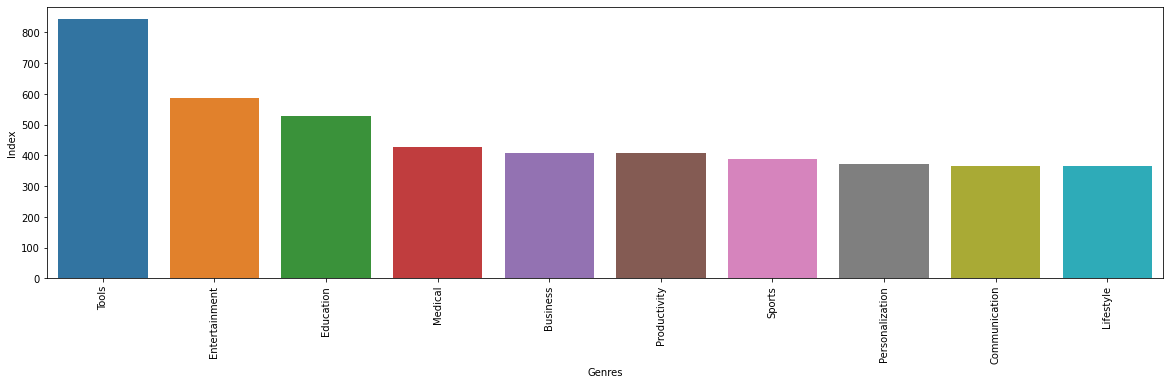

In [50]:
plt.figure(figsize=(20,5))
fig=sns.barplot(x=x['Genres'],y=y['Index']);
plt.xticks(rotation=90);

# **10.count of apps for each age group(content rating)**

In [51]:
df1['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10357, dtype: object

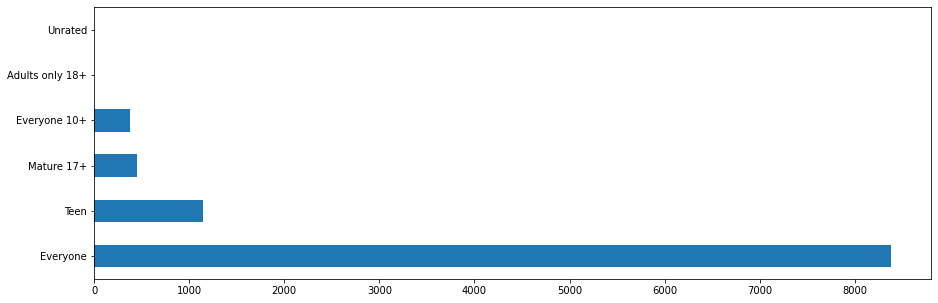

In [151]:
#app for different age group
df1['Content Rating'].value_counts().plot.barh(figsize=(15,5))


# **11.top 10 app whose price is max**

In [211]:
df1['Price']=df1.Price.replace('$','')
df1['Price'] = df1['Price'].apply(lambda x : float(x))

In [212]:
top_paid_apps = df1[df1['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_

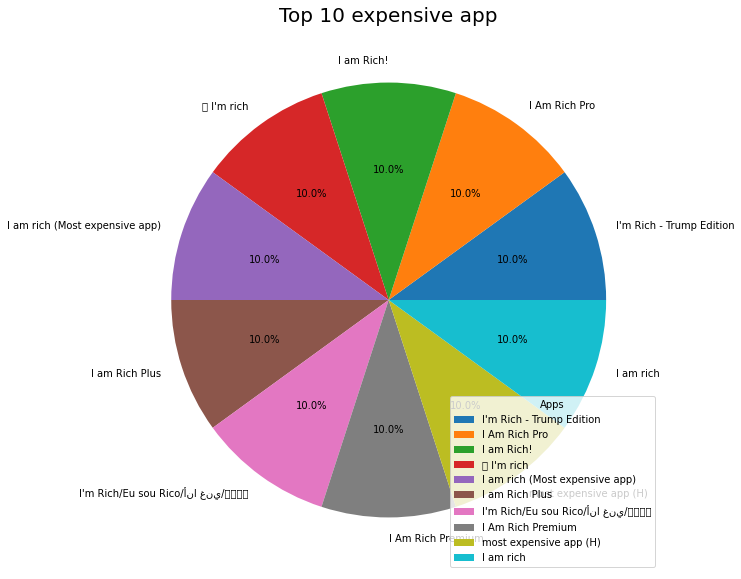

In [213]:
plt.figure(figsize=(15,10));
plt.pie(top_paid_apps.Price, explode=None, labels=top_paid_apps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top 10 expensive app',size = 20);
plt.legend(top_paid_apps.App, loc="lower right", title="Apps");

# **12.finding Android version for each Category**

In [60]:
#filling all the null values with '1.0'
df1['Android Ver'].fillna('1.0', inplace=True)

In [156]:
#replacing all the value of Android version into single digit(float)
df1['Android Ver'].replace({'4.4W and up':'4.4','Varies with device':'1.0'},inplace=True)
df1['Android Ver'].replace({a: '1.0' for a in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df1['Android Ver'].replace({a: '2.0' for a in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df1['Android Ver'].replace({a: '3.0' for a in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df1['Android Ver'].replace({a: '4.0' for a in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df1['Android Ver'].replace({a: '5.0' for a in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df1['Android Ver'].replace({a: '6.0' for a in ['6.0 and up']},inplace=True)
df1['Android Ver'].replace({a: '7.0' for a in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df1['Android Ver'].replace({a: '8.0' for a in ['8.0 and up']},inplace=True)

In [62]:
df1['Android Ver'].head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: Android Ver, dtype: object

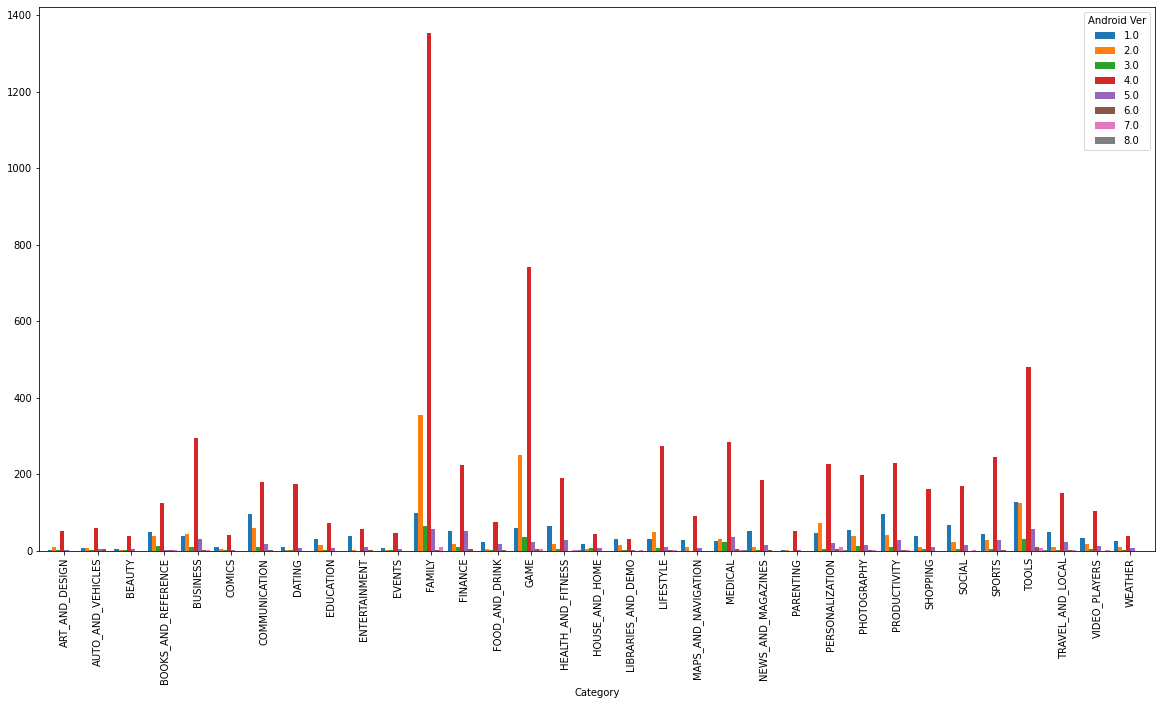

In [63]:
#plotting bar
category_version = df1.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(20,10), width=1)
plt.show()

# **13.Effect of updation of app on their Ratings**

In [64]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.0


In [65]:
#converting into datetime format
df1['Last Updated']=pd.to_datetime(df1['Last Updated'])

In [66]:
df1['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [67]:
update_rating=df1.groupby(['Last Updated'])['Rating'].count()

In [68]:
update_rating

Last Updated
2010-05-21      1
2011-01-30      1
2011-03-16      1
2011-04-11      1
2011-04-16      1
             ... 
2018-08-04     96
2018-08-05     49
2018-08-06    141
2018-08-07     41
2018-08-08      5
Name: Rating, Length: 1377, dtype: int64

Text(0.5, 1.0, 'Last Update VS Rating')

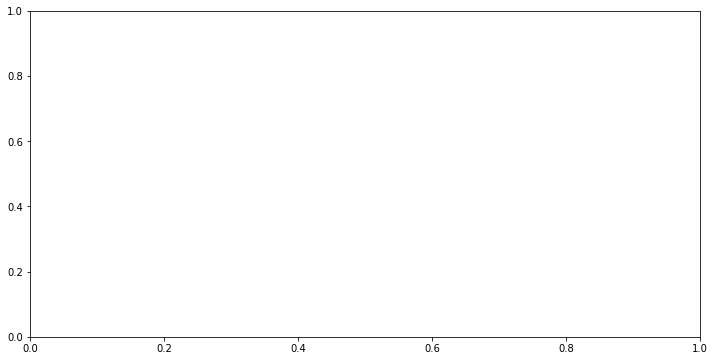

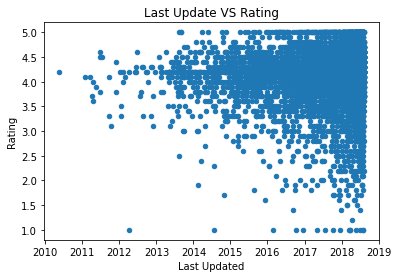

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
df1.plot.scatter(x="Last Updated", y="Rating")
plt.title("Last Update VS Rating")

# **14.effect of price on Rating**

Text(0.5, 1.0, 'Price VS Rating')

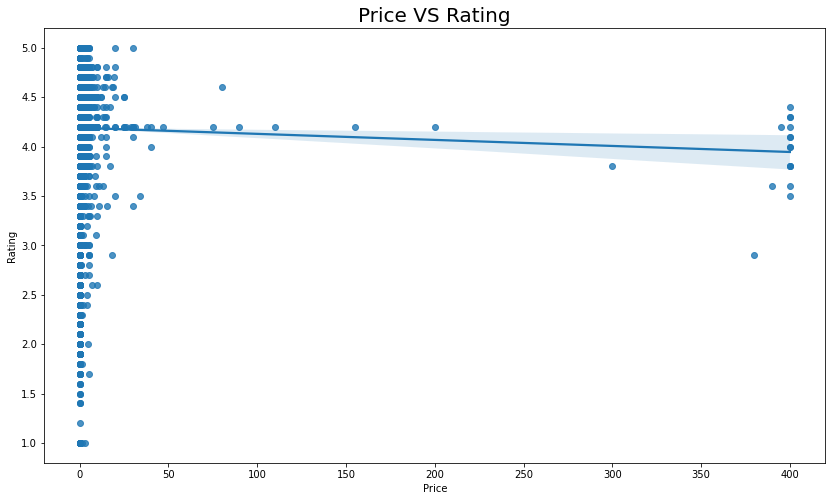

In [179]:
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Price", y="Rating", data=df1)
plt.title("Price VS Rating", size=20)

# **15.is number of installs depend on size of the app?**

In [72]:
df1['Size'].tail(15)

10826    Varies with device
10827                   13M
10828                   13M
10829                  7.4M
10830                  2.3M
10831                  9.8M
10832                  582k
10833                  619k
10834                  2.6M
10835                  9.6M
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, dtype: object

In [98]:
#converting 'Size' data type to int
df1['Size']=df1.Size.replace({'M':'000000','k':'000','Varies with device':'1.00'})

In [130]:
df1['Size'].tail(10)

10831    9.8000000
10832       582000
10833       619000
10834    2.6000000
10835    9.6000000
10836     53000000
10837    3.6000000
10838    9.5000000
10839         1.00
10840     19000000
Name: Size, dtype: object

In [126]:
install_size=df1.groupby(['Size'])['Installs'].count()

In [119]:
install_size

Size
1.00         1526
1.0000000       7
1.1000000      32
1.2000000      41
1.3000000      35
             ... 
982000          1
986000          1
99000000       38
992000          1
994000          1
Name: Installs, Length: 461, dtype: int64

Text(0.5, 0, 'size of apps')

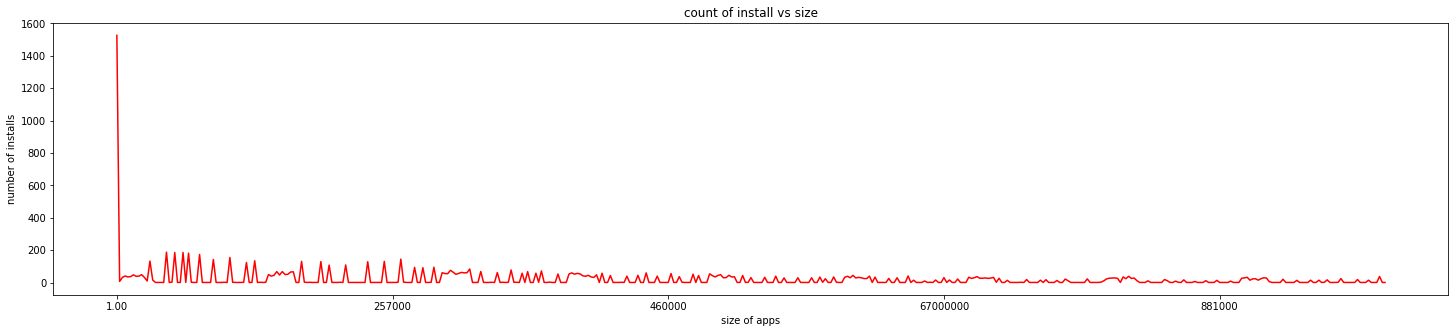

In [129]:
install_size.plot(figsize=(25,5),color='r')
plt.title('count of install vs size')
plt.ylabel('number of installs')
plt.xlabel('size of apps')

# **16.importing user_review file**

In [132]:
#importing user Review file
df_review=pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [133]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [134]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [140]:
#dropping all the null values
new_df_review=df_review.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

# **17.finding correlation between play store data and user review data**

In [165]:
df1.drop(['a'],axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000000,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7000000,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000000,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8000000,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53000000,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6000000,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.0
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5000000,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,1.00,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,1.0


In [166]:
#copy of playstore data
x = df1.copy() 
#copy of user review data
y = new_df_review.copy()

In [171]:
#merging 
merged_df1_review = pd.merge(x, y, how='inner', left_on='App', right_on='App')

In [175]:
merged_df1_review.drop(['a'],axis=1,inplace=True)

In [176]:
merged_df1_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,I hate,Negative,-0.800,0.900000


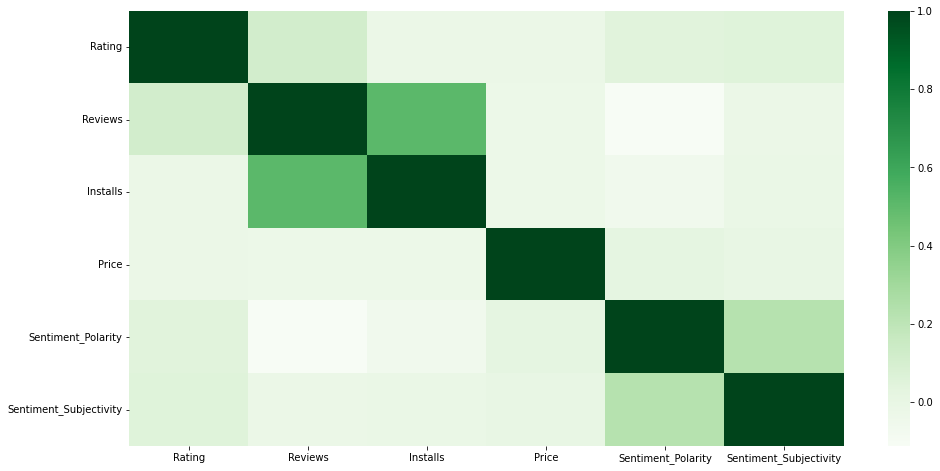

In [178]:
plt.figure(figsize=(16,8))
corr= merged_df1_review.corr()
sns.heatmap(corr,cmap='Greens')
plt.show()

# **18.Distribution of subjectvity**

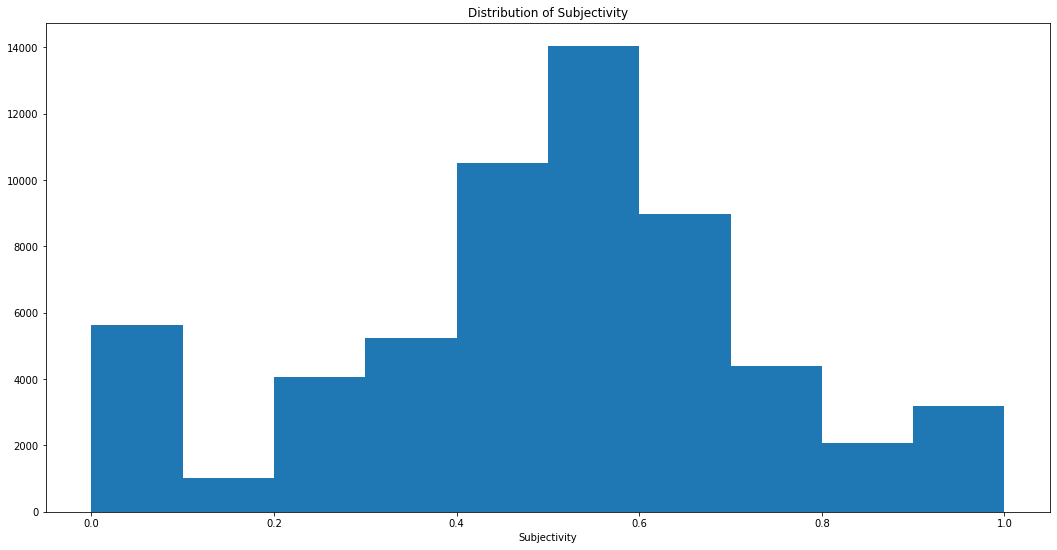

In [187]:
plt.figure(figsize=(18,9))
plt.hist(merged_df1_review[merged_df1_review['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")

plt.show()

# **19.Sentiment for free vs paid**

In [189]:
type_sentiment=merged_df1_review.groupby(['Type'])['Sentiment'].value_counts()

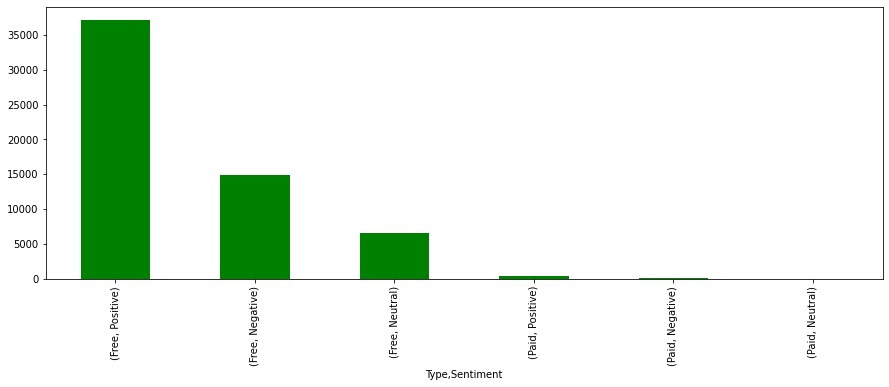

In [193]:
type_sentiment.plot.bar(figsize=(15,5),color='g')

# **20.finding percentage of all Sentiment (reviews of the users) **

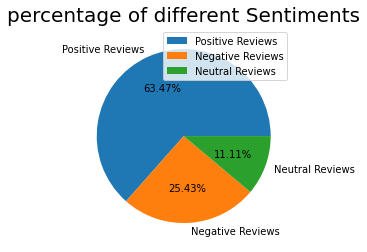

In [203]:
counts = list(merged_df1_review['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.pie(counts, labels=labels,autopct="%.2f%%")
plt.title('percentage of different Sentiments', fontsize=20)
plt.legend()
plt.show()